<a href="https://colab.research.google.com/github/WenchangGaoT/VA_Group1/blob/main/BitMaps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
from PIL import Image

In [ ]:
img_bmp = Image.open('Lekagul Roadways.bmp')
# img_jpg = Image.open('Lekagul Roadways labeled v2.jpg')

In [63]:
import numpy as np

In [ ]:
img_bmp = np.array(img_bmp)
station_map = {}
for i in img_bmp:
  for j in i: 
    if j != 0 and j != 35: station_map.update({j: 'New Node'})
print(len(station_map))

34


In [ ]:
coordinate_dict = {}
entrances, general_gates, ranger_stops, gates, campings, ranger_bases = 0, 0, 0, 0, 0, 0
shape_x, shape_y = img_bmp.shape
histo = np.zeros((255,), dtype=np.int32)
bmp_list = []
print(img_bmp.dtype)
for x in range(shape_x):
  for y in range(shape_y):
    histo[img_bmp[x, y]] += 1
for i in range(1, 255):
  if histo[i] > 0 and i != 35:
    print(i, histo[i])
    bmp_np = np.ones_like(img_bmp, dtype=np.uint8)*i 
    img_temp = Image.fromarray(bmp_np)
    img_temp.save('%d.bmp' % i)
    # bmp_list




AttributeError: ignored

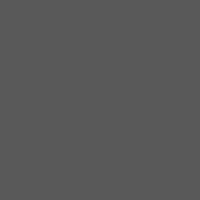

TypeError: ignored

In [ ]:
bmp_34 = Image.open('24.bmp')
bmp_34.show()
img_bmp = Image.open('Lekagul Roadways.bmp', info=1)
img_bmp.show()
# print(bmp_8)

In [ ]:
img_np = np.array(img_bmp)
histo = np.zeros((255), dtype=np.int32)
for i in range(200):
  for j in range(200):
    if histo[img_np[i, j]] == 0:
      img_temp_np = np.ones_like(img_np)*i 
      img_temp_bmp = Image.fromarray(img_temp_np)
      img_temp_bmp.save('%d.bmp' % img_np[i, j])
    histo[img_np[i, j]] += 1

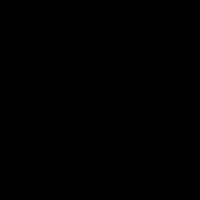

0


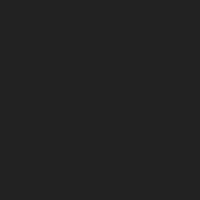

1


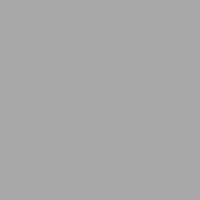

2


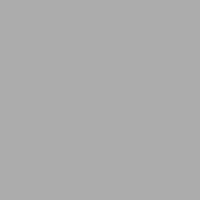

3


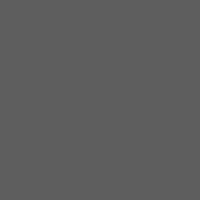

4


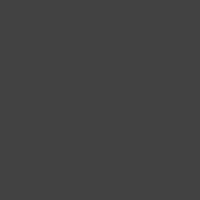

5


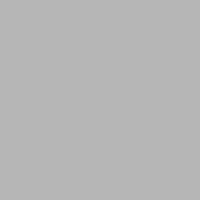

6


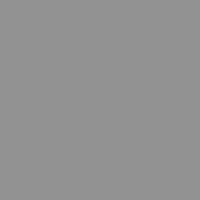

7


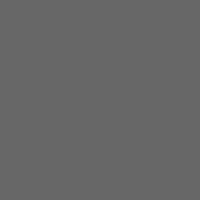

8


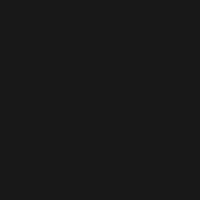

9


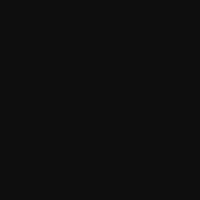

10


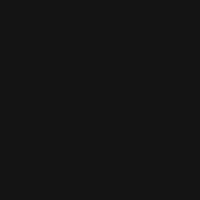

11


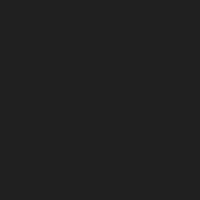

12


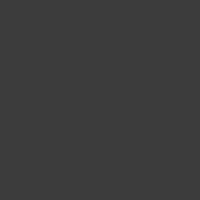

13


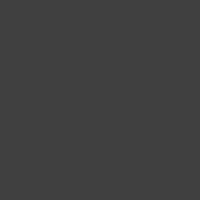

14


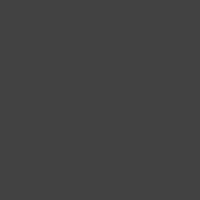

15


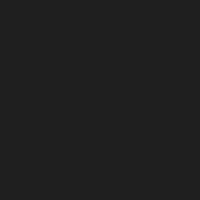

16


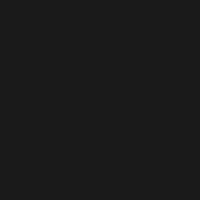

17


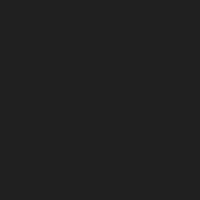

18


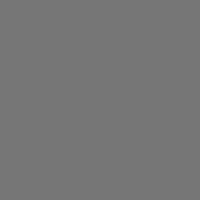

19


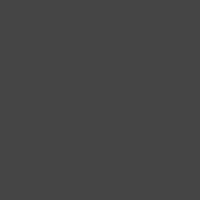

20


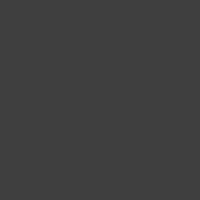

21


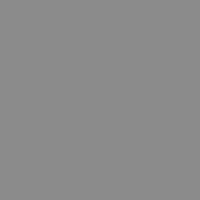

22


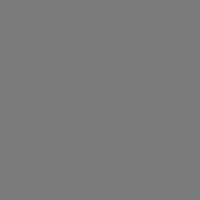

23


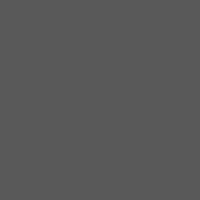

24


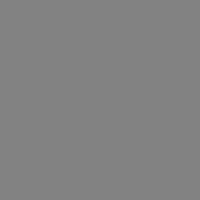

25


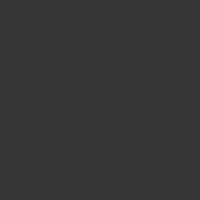

26


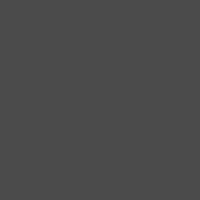

27


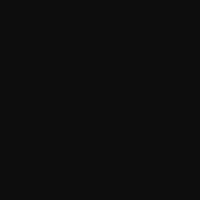

28


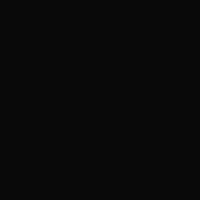

29


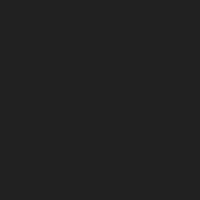

30


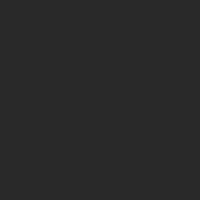

31


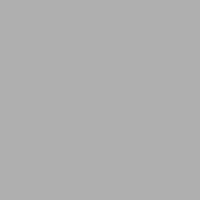

32


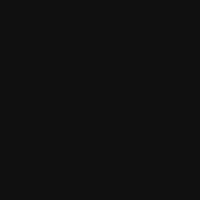

33


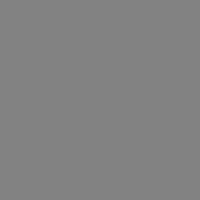

34


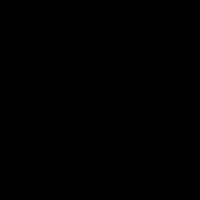

35


In [ ]:
for i in range(36):
  temp = Image.open('%d.bmp' % i)
  temp.show()
  print(i)

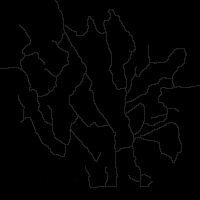

In [ ]:
fig = Image.fromarray(img_np)
fig.show()

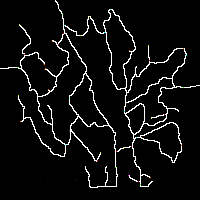

In [ ]:
fig = Image.open('Lekagul Roadways.bmp')
fig_rgb = fig.convert('RGB')
fig_rgb.show()

In [ ]:
fig_np = np.array(fig_rgb)
print(fig_np.shape)
print(fig_np.dtype)

(200, 200, 3)
uint8


In [ ]:
saved_tuple = {}
for i in range(200):
  for j in range(200):
    cur_tuple = (fig_np[i][j][0], fig_np[i][j][1], fig_np[i][j][2])
    if cur_tuple not in saved_tuple.keys():
      temp = np.ones_like(fig_np, dtype=np.uint8)
      for l in range(200):
        for k in range(200):
          for z in range(3):
            temp[l, k, z] = cur_tuple[z]
      temp_jpg = Image.fromarray(temp)
      temp_jpg.show()
      print('%d_%d_%d.jpg' % cur_tuple)
      temp_jpg.save('%d_%d_%d.jpg' % cur_tuple)
      saved_tuple[cur_tuple] = (i, j)

In [ ]:
to_clean = [(17, 17, 17), (18, 18, 18), (16, 16, 16), (24, 24, 24), (23, 23, 23), (25, 25, 25), 
            (19, 19, 19), (1, 1, 1), (20, 20, 20), (70, 70, 70), (64, 64, 64), (21, 21, 21), 
            (6, 6, 6), (22, 22, 22), (46, 46, 46), (72, 72, 72), (67, 67, 67), (5, 5, 5), 
            (14, 14, 14), (31, 31, 31), (66, 66, 66), (68, 68, 68)]

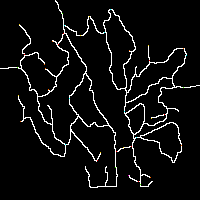

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [4]:
# Clean and convert the bmp into a jpg
fig_np = np.array(Image.open('Lekagul Roadways.bmp').convert('RGB'))
for i in range(200):
  for j in range(200):
    cur_tuple = fig_np[i, j, :]
    flag = cur_tuple[0] == cur_tuple[1] and cur_tuple[1] == cur_tuple[2]
    if flag:
      fig_np[i, j, :] = np.ones((3), dtype=np.uint8)*255 if cur_tuple[0] > 123 \
                                          else np.zeros((3), dtype=np.uint8)
cleaned_fig_np = fig_np
cleaned_fig_jpg = Image.fromarray(cleaned_fig_np)
cleaned_fig_jpg.show()
cleaned_fig_jpg.save('cleaned_roadways.jpg')
print(cleaned_fig_np)


In [61]:
cleaned_singles_map = np.zeros((200, 200, 2), dtype=np.int8)
for i in range(200):
  for j in range(200):
    if (cleaned_fig_np[i][j] == np.array([0,0,0])).all():
      cleaned_singles_map[i][j] = [0,-1]
    if ((cleaned_fig_np[i][j] == np.array([0,255,255])).all()):
      cleaned_singles_map[i][j] = [2, 0]
    if (cleaned_fig_np[i][j] == np.array([76,255,0])).all():
      cleaned_singles_map[i][j] = [3, 0]
    if (cleaned_fig_np[i][j] == np.array([255,216,0])).all():
      cleaned_singles_map[i][j] = [4, 0]
    if (cleaned_fig_np[i][j] == np.array([255,0,0])).all():
      cleaned_singles_map[i][j] = [5, 0]
    if (cleaned_fig_np[i][j] == np.array([255,106,0])).all():
      cleaned_singles_map[i][j] = [6, 0]
    if (cleaned_fig_np[i][j] == np.array([255,0,220])).all():
      cleaned_singles_map[i][j] = [7, 0]
    if (cleaned_fig_np[i][j] == np.array([255, 255, 255])).all():
      cleaned_singles_map[i][j] = [1, 1]
print(cleaned_singles_map)


[[[ 0 -1]
  [ 0 -1]
  [ 0 -1]
  ...
  [ 0 -1]
  [ 0 -1]
  [ 0 -1]]

 [[ 0 -1]
  [ 0 -1]
  [ 0 -1]
  ...
  [ 0 -1]
  [ 0 -1]
  [ 0 -1]]

 [[ 0 -1]
  [ 0 -1]
  [ 0 -1]
  ...
  [ 0 -1]
  [ 0 -1]
  [ 0 -1]]

 ...

 [[ 0 -1]
  [ 0 -1]
  [ 0 -1]
  ...
  [ 0 -1]
  [ 0 -1]
  [ 0 -1]]

 [[ 0 -1]
  [ 0 -1]
  [ 0 -1]
  ...
  [ 0 -1]
  [ 0 -1]
  [ 0 -1]]

 [[ 0 -1]
  [ 0 -1]
  [ 0 -1]
  ...
  [ 0 -1]
  [ 0 -1]
  [ 0 -1]]]


In [21]:
name_list = ['general_gate', 'entrance', 'ranger_stop', 'gate', 'camping', 'ranger_base']
name_color_dict = {
    'general_gate':(0, 255, 255),
    'entrance':(76, 255, 0),
    'ranger_stop':(255, 216, 0),
    'gate':(255, 0, 0),
    'camping':(255, 106, 0),
    'ranger_base':(255, 0 , 220)
}

In [22]:
color_name_dict = {}
for key in name_color_dict:
  color_name_dict[name_color_dict[key]] = key
# print(color_name_dict)

In [23]:
sensor_coordinate_dict = {}
coordinate_sensor_dict = {}
sensor_index_dict = {}
index_sensor_dict = {}
name_count = {}
index = 50
for i in range(200):
  for j in range(200):
    cur = (cleaned_fig_np[i, j, 0], cleaned_fig_np[i, j, 1], cleaned_fig_np[i, j, 2])
    if cur in color_name_dict.keys():
      sensor_type = color_name_dict[cur]
      if sensor_type not in name_count.keys():
        name_count[sensor_type] = 0
      sensor = (sensor_type+'_%d') % name_count[sensor_type]
      name_count[sensor_type] += 1
      sensor_index_dict[sensor] = index
      index_sensor_dict[index] = sensor
      sensor_coordinate_dict[sensor] = (i, j)
      coordinate_sensor_dict[(i, j)] = sensor
      index += 1

In [24]:
# Create a simplified graph for DFS
graph = np.zeros((200, 200), dtype=np.uint8)
for i in range(200):
  for j in range(200):
    cur = (cleaned_fig_np[i, j, 0], cleaned_fig_np[i, j, 1], cleaned_fig_np[i, j, 2])
    if cur == (255, 255, 255):
      graph[i][j] = 1
      continue
    if (i, j) in coordinate_sensor_dict.keys():
      id = sensor_index_dict[coordinate_sensor_dict[(i, j)]]
      graph[i][j] = id
# print(graph)

In [81]:
from numpy.core.fromnumeric import nonzero
action_list = ['up', 'down', 'left', 'right']
last_action = None
# distance = 0.
# weighted_graph = np.zeros((index, index), dtype=np.float32)
graph_copy = graph.copy()
graph_road = np.zeros_like(graph_copy)
road_index = 0
coordinate_distance_dict = {}
x, y = 0, 0
road_lengths = np.zeros((100,))
start, end = None, None
road_id_sensors_map = {}
sensors_road_id_map = {}

def compute_distance(x1, y1, x2, y2, cur_distance):
  global last_action
  global graph_copy
  global action_list
  global road_index
  global coordinate_distance_dict
  global x
  global y
  global start 
  global end
  ret = False
  if x1 == x2 and y1 == y2: 
    # print(x1, y1, cur_distance)
    coordinate_distance_dict[(x, y, x2, y2)].append(cur_distance)
    road_index += 1
    road_lengths[road_index] = cur_distance
    road_id_sensors_map[road_index] = (start, end)
    sensors_road_id_map[(start, end)] = road_index 
    sensors_road_id_map[(end, start)] = road_index
    return True
  if x1 < 0 or x1 >= 200 or y1 < 0 or y1 >= 200:
    return False
  if graph_copy[x1][y1] != 1:
    return False
  graph_copy[x1][y1] = 0
  for action in action_list:
    new_dist = np.sqrt(2) if (action in ['up', 'down'] and last_action in ['left', 'right']) or \
                            (action in ['left', 'right'] and last_action in ['up', 'down']) else 1. 
    temp = last_action
    last_action = action
    # print(last_action)
    distance = new_dist + cur_distance
    if action == 'up':
      done = compute_distance(x1, y1-1, x2, y2, distance)
    elif action == 'down':
      done = compute_distance(x1, y1+1, x2, y2, distance)
    elif action == 'left':
      done = compute_distance(x1-1, y1, x2, y2, distance)
    else:
      done = compute_distance(x1+1, y1, x2, y2, distance)
    if done: 
      # print('ha')
      graph_road[x1][y1] = road_index
      ret = True
    last_action = temp
  return ret
    # distance -= new_dist

# Calculate the distances
sensor_distance_dict = {}
for sensor1 in sensor_coordinate_dict.keys():
  start = sensor1
  id1 = sensor_index_dict[sensor1]
  x1, y1 = sensor_coordinate_dict[sensor1]
  x, y = x1, y1
  # print('start: ', x1, y1)
  for sensor2 in sensor_coordinate_dict.keys():
    end = sensor2
    id2 = sensor_index_dict[sensor2]
    x2, y2 = sensor_coordinate_dict[sensor2]
    if id1 == id2: continue
    last_action = None
    distance = -1
    graph_copy = graph.copy()
    graph_copy[x1][y1] = 1
    graph_copy[x2][y2] = 1
    coordinate_distance_dict[(x1,y1,x2,y2)] = []
    done = compute_distance(x1, y1, x2, y2, 0)

    sensor_distance_dict[(sensor1, sensor2)] = []
    sensor_distance_dict[(sensor2, sensor1)] = []

    if done:
      distances = coordinate_distance_dict[(x1, y1, x2, y2)]

      sensor_distance_dict[(sensor1, sensor2)] = distances
      sensor_distance_dict[(sensor2, sensor1)] = distances
    break

print(sensor_distance_dict)



{('general_gate_0', 'entrance_0'): [], ('entrance_0', 'general_gate_0'): [], ('ranger_stop_0', 'general_gate_0'): [], ('general_gate_0', 'ranger_stop_0'): [], ('ranger_stop_1', 'general_gate_0'): [], ('general_gate_0', 'ranger_stop_1'): [], ('general_gate_1', 'general_gate_0'): [], ('general_gate_0', 'general_gate_1'): [], ('general_gate_2', 'general_gate_0'): [246.0782104868025, 45.28427124746189], ('general_gate_0', 'general_gate_2'): [246.0782104868025, 45.28427124746189], ('gate_0', 'general_gate_0'): [], ('general_gate_0', 'gate_0'): [], ('ranger_stop_2', 'general_gate_0'): [], ('general_gate_0', 'ranger_stop_2'): [], ('camping_0', 'general_gate_0'): [], ('general_gate_0', 'camping_0'): [], ('gate_1', 'general_gate_0'): [], ('general_gate_0', 'gate_1'): [], ('ranger_stop_3', 'general_gate_0'): [], ('general_gate_0', 'ranger_stop_3'): [], ('camping_1', 'general_gate_0'): [279.705627484772, 287.50461735799547], ('general_gate_0', 'camping_1'): [279.705627484772, 287.50461735799547],

In [ ]:
for key in sensor_distance_dict.keys():
  distance = sensor_distance_dict[key]
  if distance != -1:
    print(key, distance)

In [ ]:
print(graph_road.shape)
for i in range(200):
  for j in range(200):
    if graph_road[i][j] != 0:
      print(i, j, graph_road[i][j])

In [64]:
for i in range(200):
  for j in range(200):
    if cleaned_singles_map[i][j][0] == 1:
      cleaned_singles_map[i][j][1] = graph_road[i][j]

In [65]:
import json

In [80]:
data = []
# with open('bmp_per_pixel.json', 'w') as outfile:
for i in range(200):
  for j in range(200):
    # with open('bmp_per_pixel.json', 'w') as outfile:
      # print(j)
    data_new = {
            'x': int(i),
            'y': int(j),
            'type': int(cleaned_singles_map[i][j][0]),
            'road': int(cleaned_singles_map[i][j][1])
      }
    data.append(data_new)
    # json_string = json.dumps(data)
      # outfile.write(json_string)
with open('bmp_per_pixel.json', 'w') as outfile:
  json.dump(data, outfile)
  # outfile.write(json_string)

In [84]:
road_info = []

# num_roads = max(road_lengths)
for i in range(1, 100):
  if road_lengths[i] == 0:
    break
  road = {
      'index': i,
      'length': road_lengths[i],
      'sensor1': road_id_sensors_map[i][0],
      'sensor2': road_id_sensors_map[i][1]
  }
  road_info.append(road)

with open('road_info.json', 'w') as outfile:
  json.dump(road_info, outfile)


In [83]:
print(road_lengths)

[  0.         246.07821049  45.28427125 279.70562748 287.50461736
  93.46803743 202.72287143 295.36248173 303.16147161 220.5218613
 228.32085117 274.56349186 282.36248173 169.2670273  177.06601718
 332.50461736 340.30360723 411.24473273 419.0437226  420.90158698
 428.70057685 482.84271247 490.64170235 473.52900398 481.32799385
 474.11479041 481.91378029   0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.  